# Anwendungsbereich 2 
**Aufgabenstellung 1**

##  Einleitung:

Die EDGAR-Gitterkarten zu Treibhausgasemissionen bieten zuverlässige Informationen zur Unterstützung der Entwicklung regionaler Klimapolitiken. Sie verwenden kontinuierlich aktualisierte und verbesserte räumliche Proxys zur Herabskalierung nationaler Emissionen auf eine globale Gitterkarte. Diese regionalen NUTS2-Treibhausgasemissionen werden im europäischen Bereich von der GD REGIO in den EU-Kohäsionsberichten (2022) genutzt und unterstützen den Jahreszyklus des EU-Semesters.

[Quelle: European Commission, Joint Research Centre](http://edgar.jrc.ec.europa.eu/overview.php?v=42FT2012)





**Aufgaben:**
1. Im Jupyter Notebook hat man die Möglichkeit, bestehende Datensätze einlesen zu lassen. Importieren Sie den Datensatz der [CO2-Emissionen](EDGAR_GHG_AR4_NUTS2_by_country_1990_2021.xls) und zeigen Sie die ersten fünf Zeilen an. 
Welche Schritte zur Datenaufbereitung mussten Sie durchführen, um Ihr Datenset analysierbar zu machen?
Hinweis: Denken Sie an die Struktur der Excel-Datei und welche Teile davon für die Analyse wichtig sind.

2. In der Regel muss man das Datenset vorher bereinigen und nur sinvolle Features in Beatracht ziehen. Überlegen Sie, wie Sie die ersten Zeilen überspringen und den Index entsprechend anpassen können und wie die Spaltennamen festgelegt und welche Zeilen entfernt werden sollten.
Hinweis: Wir möchten uns nur die Daten für DE ansehen.z.B anhand eines bestimmten Kriteriums (z.B. Städtenamen) die Daten filtern.

3. Denken Sie darüber nach, wie die Datenstruktur verändert werden kann, um eine zeilenweise Analyse zu ermöglichen. Überlegen Sie, wie die Summe der Emissionen berechnet und in den bestehenden DataFrame integriert werden kann.
Hinweis: (wie könnte man einen DataFrame transponieren?)

4. Plotten Sie die Emissionen einzelner Städte und die Gesamtemissionen?

   
5. Führen Sie eine Regressionsanalyse durch. Berechnen Sie die Regressionslinie und plotten d sie im einem Plot mit den CO2-Daten. Wie könne Sie die Genauigkeit der linearen Regression beurteilen. z.B ([R2 und MAE](Theorie.ipynb))
6. **Hausaufgabe** : Führen Sie nun eine Polynomial Regressionsanalyse durch und vergleichen die Geanuigkeit beider Modelle. 
  




1. **Problemstellung:** 
Wie können die CO2-Emissionen einzelner Städte in Deutschland über die Jahre analysiert und visualisiert werden, und wie lässt sich eine lineare Regression zur Vorhersage der Emissionstrends durchführen?
2. **Lösungssatz:**
   - Einlesen der Daten: Laden der Excel-Datei, die CO2-Emissionsdaten für verschiedene Städte in Deutschland enthält.
   - Datenaufbereitung: Filterung und Bereinigung der Daten, um nur relevante Informationen für spezifische Städte und Zeiträume zu behalten.
   - Analyse einzelner Städte: Darstellung der Emissionen für Städte wie Freiburg, Hamburg und Berlin über die Jahre hinweg.
   - Berechnung der Gesamtemissionen: Summierung der Emissionen aller Städte und Darstellung dieser Summen.
   - Lineare Regression: Durchführung einer Regressionsanalyse, um Trends in den Emissionen zu identifizieren und vorherzusagen.
   - Visualisierung: Erstellen von Diagrammen zur anschaulichen Darstellung der Emissionen und der Regressionslinie.


3. **Voraussetzungen:**
Grundkenntnisse in Python, Erfahrung mit pandas und numpy für Datenmanipulation, scipy für statistische Analysen (lineare Regression) und matplotlib für Datenvisualisierung.

**Aufgabenbearbeitung:**

1. **Anforderungen:**
   Analysieren und visualisieren Sie die CO2-Emissionen verschiedener deutscher Städte über mehrere Jahre. Führen Sie eine lineare Regression durch, um Emissionstrends zu identifizieren und vorherzusagen.
   -  Benötigte Bibliotheken: Pandas für die Datenmanipulation, Matplotlib für die Visualisierung, und Scipy sowie Scikit-Learn für die lineare Regression und die Berechnung von Genauigkeitsmetriken.

2. **Modellbildung:**
    Erstellen Sie ein Modell, das die jährlichen CO2-Emissionen der Städte vorhersagen kann.
    
3. **Algorithmierung/Entwurf:**
   - Datenbereinigung:
Entfernen irrelevanter Spalten (NUTS_ID, CNTR_CODE, NAME_LATN).
Filtern der Daten nach Ländern und Städten.
   - Berechnung der Emissionen:
Summieren der Emissionen aller Städte.
    - Plotten der Emissionen:
Erstellung von Diagrammen für einzelne Städte und die Gesamtemissionen.
    - Lineare Regression:
Durchführung der Regression zur Vorhersage von Emissionstrends.

   


5. **Implementierung:**
   - Verwendete Bibliotheken: pandas für die Datenmanipulation, scipy für die statistische Analyse, matplotlib für die Datenvisualisierung.
   - Schritte :
        - Daten einlesen und vorbereiten
        - Filtern und Bereinigen der Daten
        - Berechnung der Gesamtemissionen
        - Visualisierung der Daten
        - Lineare Regression
        - Modellbewertung: Bewerten Sie die Leistung des Modells anhand geeigneter Metriken wie z.b [R2 und MAE](Theorie.ipynb)
6. **Anwendung und Test:**
    - Visualisierung: Erstellen Sie Diagramme, um die Leistung des Modells zu zeigen, z.B. vorhergesagte vs. tatsächliche Werte.
    - Berechnung von Genauigkeitsmetriken:

        
   

In [2]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler



In [3]:
# Laden der Excel-Datei und Speichern der Daten in einem DataFrame
file_path = 'EDGAR_GHG_AR4_NUTS2_by_country_1990_2021.xlsx'
df = pd.read_excel(file_path)
df.head(10)  # Anzeige der ersten 10 Zeilen zur Überprüfung der Daten
#df.info()
#df.describe()


,Data source: Emissions Database for Global Atmospheric Research (EDGAR),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"Data release: EDGARv7.0_FT2021, https://edgar....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Emissions of total greenhouse gases (GHG) incl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Emissions are reported for the European domain...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Emissions from international shipping and avia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Emissions over seas (i.e. domestic shipping, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NUTS_ID,CNTR_CODE,NAME_LATN,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
8,AT11,AT,Burgenland,2068.167336,2196.740723,2134.660443,2127.356098,2091.145599,2134.251105,2248.750789,...,2201.048493,2276.940505,2220.533417,2248.330293,2306.613263,2332.951869,2319.415704,2329.860375,2122.919720,2170.567266
9,AT12,AT,Niederösterreich,16345.822775,17342.267247,16815.898836,17504.277794,17329.615392,17375.573424,18529.353897,...,16753.458226,16879.555498,16330.783420,16731.928287,17059.129729,17530.397463,17098.642850,17503.400150,16099.620286,16542.109352


In [4]:
# Auswahl der Daten ab Zeile 9 und Zurücksetzen des Indexes
df2 = df.iloc[7:].reset_index(drop=True)

# Übernahme der Spaltennamen aus der ersten Zeile nach dem Filter (ursprünglich Zeile 9)
df2.columns = df2.iloc[0]

# Entfernen der ersten Zeile, da diese jetzt die Spaltennamen enthält
df2 = df2.drop(0)

# Anzeigen der bereinigten Daten
df2

,NUTS_ID,CNTR_CODE,NAME_LATN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,AT11,AT,Burgenland,2068.167336,2196.740723,2134.660443,2127.356098,2091.145599,2134.251105,2248.750789,...,2201.048493,2276.940505,2220.533417,2248.330293,2306.613263,2332.951869,2319.415704,2329.860375,2122.919720,2170.567266
2,AT12,AT,Niederösterreich,16345.822775,17342.267247,16815.898836,17504.277794,17329.615392,17375.573424,18529.353897,...,16753.458226,16879.555498,16330.783420,16731.928287,17059.129729,17530.397463,17098.642850,17503.400150,16099.620286,16542.109352
3,AT13,AT,Wien,7014.976859,7284.751913,6909.504332,7275.017356,7313.070536,7556.386884,8274.372403,...,7801.310710,7334.995146,6942.664118,7222.068859,7215.483402,7707.321625,7400.097655,7937.894196,7455.011224,7755.672288
4,AT21,AT,Kärnten,4865.489472,5211.204512,5114.409939,5200.585580,5185.678550,5324.720913,5477.799529,...,5542.636631,5771.376657,5626.678742,5744.696341,5897.479804,5958.323353,5842.212562,5858.095443,5386.033177,5520.176550
5,AT22,AT,Steiermark,19007.532446,20213.357443,17783.569207,17078.920886,17684.774038,19131.135415,19723.093147,...,17376.443191,17676.740774,16401.920277,16476.023397,16083.135293,16150.083622,15657.504357,15670.523184,14334.339223,14863.850313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,NL,NL,816.513,864.356000,829.271000,829.271000,835.650000,730.397000,762.292000,720.828000,...,1103.570000,960.041000,1049.350000,972.799000,939.899000,935.271000,857.589000,783.891000,785.614000,NaN
308,PL,PL,270.14,192.817000,158.854000,65.688100,25.453400,56.253300,53.316200,47.842600,...,9.568510,9.568510,6.379010,6.379010,14.563200,6.292910,5.836940,5.527680,5.926910,NaN
309,PT,PT,137.149,133.959000,127.580000,149.907000,159.475000,146.717000,146.717000,140.338000,...,386.813000,270.995000,306.214000,349.426000,309.146000,322.188000,277.700000,226.242000,232.780000,NaN
310,RO,RO,1022.48,1247.610000,1114.670000,423.070000,409.748000,328.325000,475.850000,1085.400000,...,130.263000,117.555000,136.617000,127.086000,126.619000,126.489000,136.637000,128.265000,139.592000,NaN


In [5]:
# Entfernen der Spalte 'NUTS_ID' aus dem DataFrame
df2_filtered = df2.drop(("NUTS_ID"), axis=1)
df2_filtered

,CNTR_CODE,NAME_LATN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,AT,Burgenland,2068.167336,2196.740723,2134.660443,2127.356098,2091.145599,2134.251105,2248.750789,2158.540266,...,2201.048493,2276.940505,2220.533417,2248.330293,2306.613263,2332.951869,2319.415704,2329.860375,2122.919720,2170.567266
2,AT,Niederösterreich,16345.822775,17342.267247,16815.898836,17504.277794,17329.615392,17375.573424,18529.353897,18153.341546,...,16753.458226,16879.555498,16330.783420,16731.928287,17059.129729,17530.397463,17098.642850,17503.400150,16099.620286,16542.109352
3,AT,Wien,7014.976859,7284.751913,6909.504332,7275.017356,7313.070536,7556.386884,8274.372403,7938.047951,...,7801.310710,7334.995146,6942.664118,7222.068859,7215.483402,7707.321625,7400.097655,7937.894196,7455.011224,7755.672288
4,AT,Kärnten,4865.489472,5211.204512,5114.409939,5200.585580,5185.678550,5324.720913,5477.799529,5506.589578,...,5542.636631,5771.376657,5626.678742,5744.696341,5897.479804,5958.323353,5842.212562,5858.095443,5386.033177,5520.176550
5,AT,Steiermark,19007.532446,20213.357443,17783.569207,17078.920886,17684.774038,19131.135415,19723.093147,20014.116420,...,17376.443191,17676.740774,16401.920277,16476.023397,16083.135293,16150.083622,15657.504357,15670.523184,14334.339223,14863.850313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,NL,816.513,864.356000,829.271000,829.271000,835.650000,730.397000,762.292000,720.828000,714.449000,...,1103.570000,960.041000,1049.350000,972.799000,939.899000,935.271000,857.589000,783.891000,785.614000,NaN
308,PL,270.14,192.817000,158.854000,65.688100,25.453400,56.253300,53.316200,47.842600,28.705500,...,9.568510,9.568510,6.379010,6.379010,14.563200,6.292910,5.836940,5.527680,5.926910,NaN
309,PT,137.149,133.959000,127.580000,149.907000,159.475000,146.717000,146.717000,140.338000,146.717000,...,386.813000,270.995000,306.214000,349.426000,309.146000,322.188000,277.700000,226.242000,232.780000,NaN
310,RO,1022.48,1247.610000,1114.670000,423.070000,409.748000,328.325000,475.850000,1085.400000,697.856000,...,130.263000,117.555000,136.617000,127.086000,126.619000,126.489000,136.637000,128.265000,139.592000,NaN


In [6]:
# Filtern der Daten, um nur die Zeilen zu behalten, in denen 'DE' (Deutschland) vorkommt
filtered_df = df2[df2['CNTR_CODE'] == 'DE']
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,NUTS_ID,CNTR_CODE,NAME_LATN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,DE11,DE,Stuttgart,44483.249292,44055.267183,42124.225600,41922.912094,41565.225785,41699.607123,44011.394773,...,30553.054732,31462.953858,29923.016574,30156.015816,30102.354401,29436.104013,28467.281858,26641.921220,24296.417655,25341.831316
1,DE12,DE,Karlsruhe,42277.787691,41171.467877,41018.770924,39499.792473,40026.055323,38563.952490,40135.974462,...,25996.167600,26428.813931,25252.821851,25898.170264,25954.469226,25762.153645,24377.192511,23275.886539,21529.564961,22252.330499
2,DE13,DE,Freiburg,17992.825627,17951.971557,16851.764318,16853.982861,16406.677819,16458.319899,16965.598333,...,12451.633382,12810.451594,12288.574454,12552.354736,12823.585849,12864.550043,12603.584096,12596.538967,11783.727596,11970.941547
3,DE14,DE,Tübingen,15515.975579,15498.866573,14586.734001,14614.101815,14231.774627,14223.071575,14686.635329,...,11337.154709,11661.574542,11284.043674,11524.822843,11691.849872,11697.277395,11458.456077,11378.924515,10637.393741,10793.569210
4,DE21,DE,Oberbayern,45457.455704,44958.159191,42534.905091,42509.524715,42278.969774,42189.303952,44869.295261,...,37474.874018,37924.731695,35876.066363,35811.843038,36873.031362,36666.165855,35525.741940,34951.388381,32624.931164,33411.941139
5,DE22,DE,Niederbayern,11640.499267,11469.213860,10823.479519,10817.955280,10578.256238,10577.941457,10882.893953,...,9765.301700,9976.747798,9751.697525,9949.553356,10193.774784,10220.040578,9980.753461,9949.837404,9263.255724,9396.394226
6,DE23,DE,Oberpfalz,11797.374162,11553.006275,10957.584664,10964.117792,10799.541197,10816.089316,11077.113353,...,8902.573377,9111.531868,8942.036673,9043.310809,9109.375313,9159.867416,9034.105358,8999.705594,8420.696024,8499.684250
7,DE24,DE,Oberfranken,9669.028031,9638.066938,9117.192394,9182.257496,8949.858822,8944.013552,9159.034067,...,7126.804163,7333.332065,7142.270335,7239.585302,7331.212884,7359.923035,7229.773016,7252.202637,6792.416977,6820.547786
8,DE25,DE,Mittelfranken,13858.398685,13834.452245,12945.855263,12968.423775,12740.873058,12711.359727,13395.333828,...,10481.710027,10731.599264,10297.275293,10372.929736,10598.379766,10638.466940,10378.425053,10418.822287,9814.310267,9910.508161
9,DE26,DE,Unterfranken,12550.557910,12445.921426,11795.787048,11863.651001,11728.521850,11766.067392,12168.348617,...,9987.925874,10196.404190,9854.343469,9898.998958,10104.865512,10142.286453,9929.162276,9907.121387,9269.161870,9414.157951


In [10]:
# Plotten der Emissionen einzelner Städte über die Jahre
X = filtered_df.drop(columns=['NUTS_ID', 'CNTR_CODE', 'NAME_LATN'])

# Auswahl von drei Städten: Freiburg, Hamburg und Berlin
y = filtered_df[filtered_df["NAME_LATN"] == "Freiburg"]
y2 = filtered_df[filtered_df["NAME_LATN"] == "Hamburg"]
y3 = filtered_df[filtered_df["NAME_LATN"] == "Berlin"]

# Transponieren des DataFrames X
X = X.T
X.head(10)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,,,,,,,,,,,,,,,,,,,,,
1990.0,44483.249292,42277.787691,17992.825627,15515.975579,45457.455704,11640.499267,11797.374162,9669.028031,13858.398685,12550.557910,...,32423.636502,35342.776337,33692.059427,15089.872396,12102.994636,49227.110626,32097.093964,29481.209576,2810.03,2089.130
1991.0,44055.267183,41171.467877,17951.971557,15498.866573,44958.159191,11469.213860,11553.006275,9638.066938,13834.452245,12445.921426,...,31607.477135,34555.473716,33012.348611,14918.667435,12719.670896,48036.788886,31693.949591,29184.680514,2452.69,2229.460
1992.0,42124.225600,41018.770924,16851.764318,14586.734001,42534.905091,10823.479519,10957.584664,9117.192394,12945.855263,11795.787048,...,30935.588206,32819.877156,31546.734988,14130.527668,12117.280038,46098.033754,30045.111074,27590.000552,2462.76,2261.360
1993.0,41922.912094,39499.792473,16853.982861,14614.101815,42509.524715,10817.955280,10964.117792,9182.257496,12968.423775,11863.651001,...,30302.463095,32047.330823,31209.044953,14126.606671,11685.323489,45790.924229,30074.739487,27526.911308,2303.96,2213.520
1994.0,41565.225785,40026.055323,16406.677819,14231.774627,42278.969774,10578.256238,10799.541197,8949.858822,12740.873058,11728.521850,...,30357.351023,31723.633844,30871.114970,13962.667778,11331.280463,45437.834129,29544.471308,26973.362993,2303.95,1747.850
1995.0,41699.607123,38563.952490,16458.319899,14223.071575,42189.303952,10577.941457,10816.089316,8944.013552,12711.359727,11766.067392,...,29796.636433,31519.167884,30488.028630,14120.264258,11038.723429,45618.819194,29432.679035,27116.163018,2322.53,1607.510
1996.0,44011.394773,40135.974462,16965.598333,14686.635329,44869.295261,10882.893953,11077.113353,9159.034067,13395.333828,12168.348617,...,31217.650455,31312.742914,31604.391080,14147.557228,11192.707250,45390.349859,30645.603275,26368.942732,2545.81,1269.420
1997.0,42851.016552,37883.624433,16481.051025,14307.879069,43638.887511,10694.589287,10907.445583,8974.841027,13060.550239,11930.915862,...,29937.701354,30185.920104,30452.219504,13889.653749,10526.409811,44130.481366,29874.856350,25712.792163,2551.99,1164.170
1998.0,42076.817686,27757.799883,16151.384687,14055.848651,43326.540733,10568.741898,10844.420310,8882.653179,12913.547009,11852.533533,...,25957.329220,29935.384435,30346.716408,13587.685577,10103.974934,43199.647452,29524.206741,25284.482629,2620.21,950.472


In [11]:
# Berechnung der Summe jeder Spalte und Hinzufügen als neue Zeile
summe_spalte = X.sum(axis=1)
X['Summe'] = summe_spalte

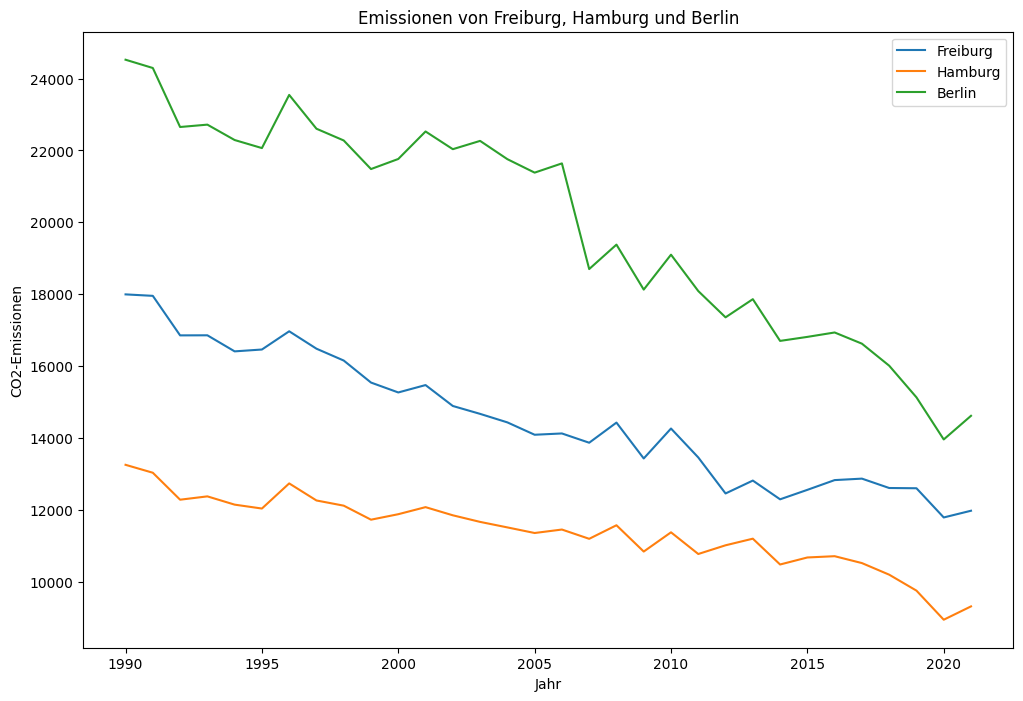

In [15]:
# Plotten der Emissionen für jede Stadt
plt.figure(figsize=(12, 8))

# Plot für Freiburg
plt.plot(y.drop(columns=['NUTS_ID', 'CNTR_CODE', 'NAME_LATN']).T, label='Freiburg')

# Plot für Hamburg
plt.plot(y2.drop(columns=['NUTS_ID', 'CNTR_CODE', 'NAME_LATN']).T, label='Hamburg')

# Plot für Berlin
plt.plot(y3.drop(columns=['NUTS_ID', 'CNTR_CODE', 'NAME_LATN']).T, label='Berlin')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Emissionen von Freiburg, Hamburg und Berlin')
plt.xlabel('Jahr')
plt.ylabel('CO2-Emissionen')
plt.legend()



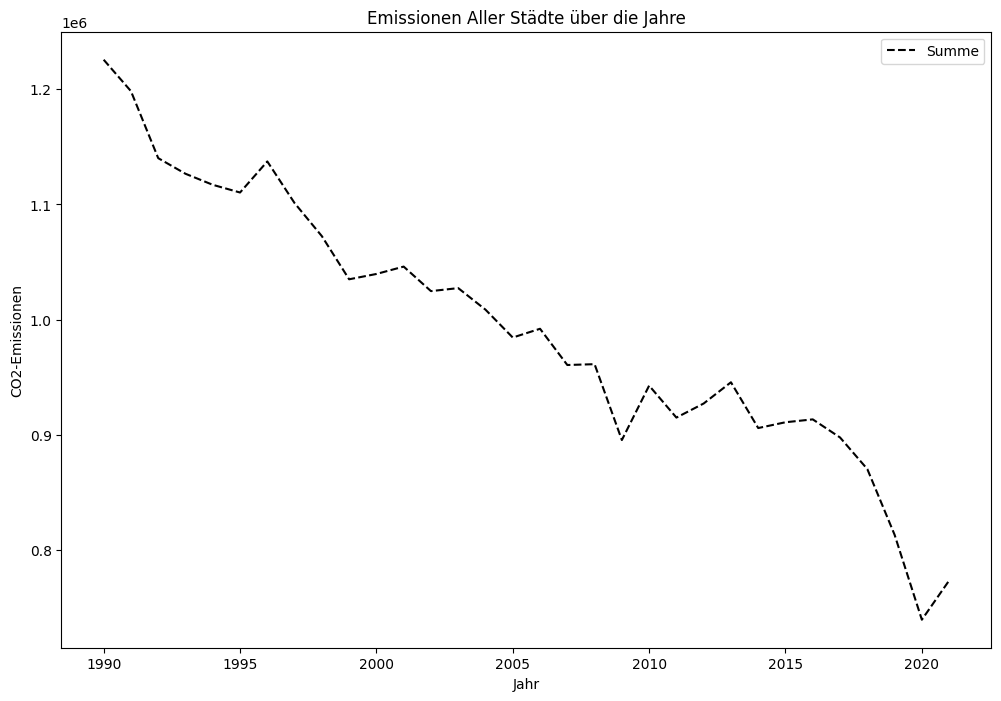

In [16]:
# Weitere Plots für alle Städte
plt.figure(figsize=(12, 8))
plt.plot(X.Summe, label='Summe', linestyle='--', color='black')


plt.legend()

# Add title and labels
plt.title('Emissionen Aller Städte über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('CO2-Emissionen')

# plotten
plt.show()

## Linear Regression

In [34]:
# Lineare Regression
x = np.arange(len(X))
y = X['Summe']

# Berechnung der Regressionslinie
slope, intercept, r_value, p_value, std_err = linregress(x, y)
X['Regressionslinie'] = intercept + slope * x
y_dach = X['Regressionslinie']

# Anzeigen der Regressionswerte
print(f'Das sind die Werte:\nSlope: {slope}, Intercept: {intercept}, R-Wert: {r_value}, P-Wert: {p_value}, Standardfehler: {std_err}')

Das sind die Werte:
Slope: -12151.15250950433, Intercept: 1180912.1014872475, R-Wert: -0.969153749505607, P-Wert: 8.408622110277826e-20, Standardfehler: 564.1637377543344


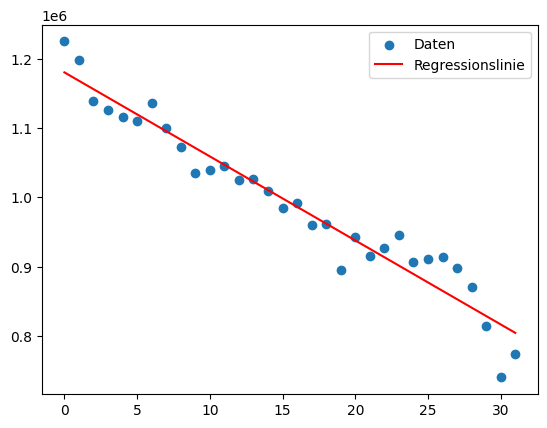

In [35]:
# Plotten der Daten und der Regressionslinie
plt.scatter(x, y, label='Daten')
plt.plot(x, y_dach, color='red', label='Regressionslinie')
plt.legend()
plt.show()

In [45]:
# Anzeigen des DataFrames X mit der neuen Spalte 'Regressionslinie'
X.head(10)


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,Summe,Regressionslinie,41
0,,,,,,,,,,,,,,,,,,,,,
1990.0,44483.249292,42277.787691,17992.825627,15515.975579,45457.455704,11640.499267,11797.374162,9669.028031,13858.398685,12550.557910,...,15089.872396,12102.994636,49227.110626,32097.093964,29481.209576,2810.03,2089.130,1.225568e+06,1.180912e+06,1.180912e+06
1991.0,44055.267183,41171.467877,17951.971557,15498.866573,44958.159191,11469.213860,11553.006275,9638.066938,13834.452245,12445.921426,...,14918.667435,12719.670896,48036.788886,31693.949591,29184.680514,2452.69,2229.460,1.198300e+06,1.168761e+06,1.168761e+06
1992.0,42124.225600,41018.770924,16851.764318,14586.734001,42534.905091,10823.479519,10957.584664,9117.192394,12945.855263,11795.787048,...,14130.527668,12117.280038,46098.033754,30045.111074,27590.000552,2462.76,2261.360,1.140173e+06,1.156610e+06,1.156610e+06
1993.0,41922.912094,39499.792473,16853.982861,14614.101815,42509.524715,10817.955280,10964.117792,9182.257496,12968.423775,11863.651001,...,14126.606671,11685.323489,45790.924229,30074.739487,27526.911308,2303.96,2213.520,1.126628e+06,1.144459e+06,1.144459e+06
1994.0,41565.225785,40026.055323,16406.677819,14231.774627,42278.969774,10578.256238,10799.541197,8949.858822,12740.873058,11728.521850,...,13962.667778,11331.280463,45437.834129,29544.471308,26973.362993,2303.95,1747.850,1.117047e+06,1.132307e+06,1.132307e+06
1995.0,41699.607123,38563.952490,16458.319899,14223.071575,42189.303952,10577.941457,10816.089316,8944.013552,12711.359727,11766.067392,...,14120.264258,11038.723429,45618.819194,29432.679035,27116.163018,2322.53,1607.510,1.110364e+06,1.120156e+06,1.120156e+06
1996.0,44011.394773,40135.974462,16965.598333,14686.635329,44869.295261,10882.893953,11077.113353,9159.034067,13395.333828,12168.348617,...,14147.557228,11192.707250,45390.349859,30645.603275,26368.942732,2545.81,1269.420,1.137334e+06,1.108005e+06,1.108005e+06
1997.0,42851.016552,37883.624433,16481.051025,14307.879069,43638.887511,10694.589287,10907.445583,8974.841027,13060.550239,11930.915862,...,13889.653749,10526.409811,44130.481366,29874.856350,25712.792163,2551.99,1164.170,1.101184e+06,1.095854e+06,1.095854e+06
1998.0,42076.817686,27757.799883,16151.384687,14055.848651,43326.540733,10568.741898,10844.420310,8882.653179,12913.547009,11852.533533,...,13587.685577,10103.974934,43199.647452,29524.206741,25284.482629,2620.21,950.472,1.072509e+06,1.083703e+06,1.083703e+06


In [22]:
# Berechnung von Genauigkeitsmetriken für die Vorhersage
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y, y_dach)  # Mittlerer absoluter Fehler (MAE)
r2 = r2_score(y, y_dach)  # Bestimmtheitsmaß (R^2 Score)

# Ausgabe der Genauigkeitsmetriken
print(f'Mittlerer absoluter Fehler (MAE): {mae}')
print(f'R^2 Score: {r2}')  # Aussagekraft der Regressionslinie

Mittlerer absoluter Fehler (MAE): 22247.432715625495
R^2 Score: 0.9392589901807771


## Polynomial Regression

Linear Regression - MAE: 21721.1899, R² Score: 0.9341
Polynomial Regression - MAE: 18294.4497, R² Score: 0.9512


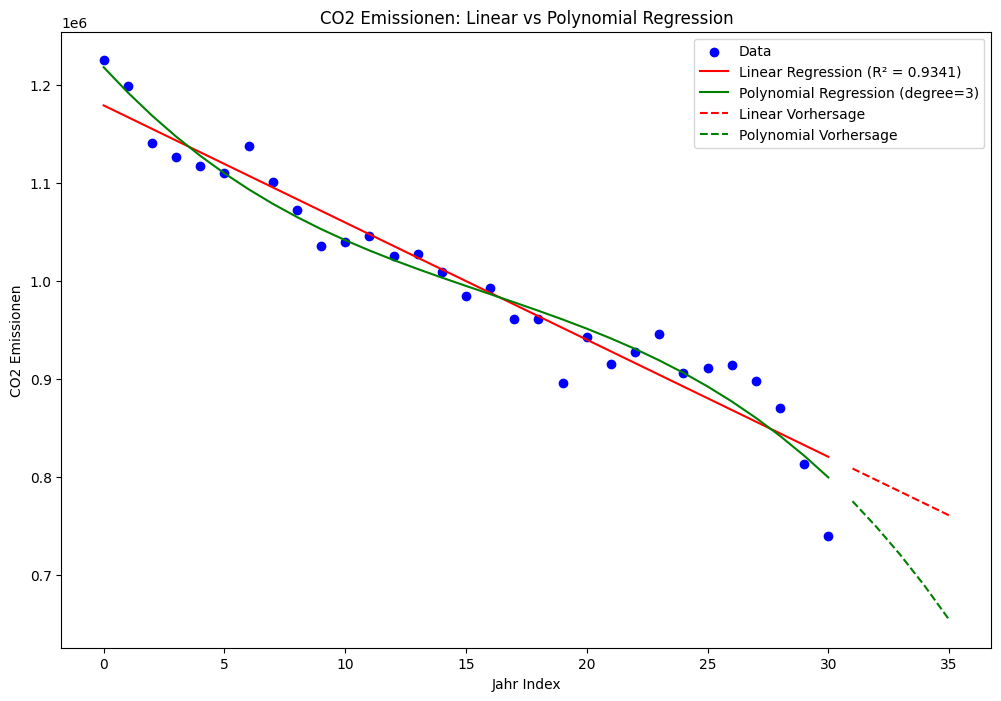

\Vorhersage der nächsten fünf Jahre:
Jahr +1: Linear: 808357.91, Polynomial: 774981.53
Jahr +2: Linear: 796403.49, Polynomial: 748477.27
Jahr +3: Linear: 784449.08, Polynomial: 719583.61
Jahr +4: Linear: 772494.67, Polynomial: 688152.75
Jahr +5: Linear: 760540.25, Polynomial: 654036.87


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline



# Figure erstellen zum Plotten
plt.figure(figsize=(12, 8))

# Linear Regression (siehe oben)
x = np.arange(len(X))
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_linear = intercept + slope * x

# Polynomial Regression
degree = 3  # You can adjust this value to change the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x.reshape(-1, 1), y)
y_poly = poly_model.predict(x.reshape(-1, 1))

# Plotten
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_linear, color='red', label=f'Linear Regression (R² = {r_value**2:.4f})')
plt.plot(x, y_poly, color='green', label=f'Polynomial Regression (degree={degree})')

plt.title('CO2 Emissionen: Linear vs Polynomial Regression')
plt.xlabel('Jahr Index')
plt.ylabel('CO2 Emissionen')
plt.legend()

# Metriken brechnen für beide Modelle
mae_linear = mean_absolute_error(y, y_linear)
r2_linear = r2_score(y, y_linear)
mae_poly = mean_absolute_error(y, y_poly)
r2_poly = r2_score(y, y_poly)

print(f'Linear Regression - MAE: {mae_linear:.4f}, R² Score: {r2_linear:.4f}')
print(f'Polynomial Regression - MAE: {mae_poly:.4f}, R² Score: {r2_poly:.4f}')

#  Vorhersage der nächsten fünf Jahre
future_x = np.arange(len(X), len(X) + 5)
future_y_linear = intercept + slope * future_x
future_y_poly = poly_model.predict(future_x.reshape(-1, 1))

# Vorhersagen plotten
plt.plot(future_x, future_y_linear, color='red', linestyle='--', label='Linear Vorhersage')
plt.plot(future_x, future_y_poly, color='green', linestyle='--', label='Polynomial Vorhersage')

plt.legend()
plt.show()

# Ausgabe der Vorhersagen
print("\Vorhersage der nächsten fünf Jahre:")
for i, (linear_pred, poly_pred) in enumerate(zip(future_y_linear, future_y_poly), 1):
    print(f"Jahr +{i}: Linear: {linear_pred:.2f}, Polynomial: {poly_pred:.2f}")